In [9]:
import pandas as pd
import numpy as np
import os

In [10]:
Group1_scores = []
Group2_scores = []
Group3_scores = []

def emotion_definer(emotions):
    emotions = emotions.split(";")
    emotions = [x.strip(' ') for x in emotions]
    valence_score = []
    arousal_score = []
    for emotion in emotions:
        emotion = emotion.lower()
        if emotion == 'happy' or emotion == 'immersed':
            valence_score.append(1)
            arousal_score.append(0)
        elif emotion == 'sad':
            valence_score.append(-1)
            arousal_score.append(0)
        elif emotion == 'angry' or 'frustrated' in emotion or 'annoyed' in emotion:
            valence_score.append(-0.5)
            arousal_score.append(1)
        elif emotion == 'tense' or emotion == 'confused':
            valence_score.append(-0.25)
            arousal_score.append(1)
        elif emotion == 'relaxed' or emotion == 'intrigued' or emotion == 'interest':
            valence_score.append(0.5)
            arousal_score.append(-1)
        elif emotion == 'excited' or emotion == 'hyped up' or emotion == 'hypedup':
            valence_score.append(0.5)
            arousal_score.append(1)
        elif emotion == 'delighted':
            valence_score.append(1)
            arousal_score.append(1)
        elif emotion == 'bored':
            valence_score.append(-1)
            arousal_score.append(-1)
        elif emotion == 'content':
            valence_score.append(1)
            arousal_score.append(-0.25)
        elif emotion == 'calm' or emotion == 'mellow':
            valence_score.append(0)
            arousal_score.append(-1)
        elif emotion == 'sleepy' or emotion == 'tired':
            valence_score.append(0)
            arousal_score.append(-1)
        elif emotion == 'nervous' or 'anxious' in emotion or emotion == 'scared':
            valence_score.append(-1)
            arousal_score.append(0.25)
        elif emotion == 'alright' or emotion == 'fine' or emotion == 'other':
            valence_score.append(0)
            arousal_score.append(0)
        
    if not valence_score:
        valence_score.append(0)
    if not arousal_score:
        arousal_score.append(0)

    val = np.mean(valence_score)
    aro = np.mean(arousal_score)

    if val is np.nan:
        val = 0
    if aro is np.nan:
        aro = 0
        
    return (val, aro)
        
        
        
    
def load_Scores(location):
    print(location)
    folder = location[:-19]
    print(folder)
    var = os.listdir(folder)
    group = ''

    if "Group 1" in location:
        group = "Group 1"
    elif "Group 2" in location:
        group = "Group 2"
    elif "Group 3" in location:
        group = "Group 3"
        folder = folder + "/"

    for file in var:
        if group in file:
            if "xlsx" in file:
                location = folder + file
                data = pd.read_excel(location)
            elif "csv" in file:
                location = folder + file
                data = pd.read_csv(location)


    if "How would you rate this performance?" in data.columns:
        order = data["Watch ID"]
        scores = data["How would you rate this performance?"]
    elif "How did you rate the performance?" in data.columns:
        order = data["Watch ID"]
        scores  = data["How did you rate the performance?"]
    elif "How would you rate this performance?（10 is the best）" in data.columns:
        order = data["ID"]
        scores  = data["How would you rate this performance?（10 is the best）"]

    if "How would you describe your feelings through the performance?" in data.columns:
        emotions = data["How would you describe your feelings through the performance?"]
    elif "How do you describe your feeling during the programme? You may make multiple choices.\n" in data.columns:
        emotions = data["How do you describe your feeling during the programme? You may make multiple choices.\n"]
        
    emotions = emotions.apply(emotion_definer)
        
    return scores, order, emotions


def match_scores_to_data(scores, scores_order, emotions, data, data_order):
    matched_scores = []
    matched_data = []
    matched_emotions = []

    # Zip the scores and order and the data and data order
    scores_zip = zip(scores_order, scores, emotions)
    data_zip = zip(data_order, data)

    # Sort the zipped lists by order
    scores_zip = sorted(scores_zip, key=lambda x: x[0])
    data_zip = sorted(data_zip, key=lambda x: x[0])

    # Unzip the sorted lists
    sorted_scores_order, sorted_scores, sorted_emotions = zip(*scores_zip)
    sorted_data_order, sorted_data = zip(*data_zip)

    # Match the scores to the data using the order of each
    for i in range(min(len(sorted_scores_order), len(sorted_data_order))):
        if sorted_scores_order[i] == sorted_data_order[i]:
            matched_scores.append(sorted_scores[i])
            matched_data.append(sorted_data[i])
            matched_emotions.append(emotions[i])
    return matched_scores, matched_data, matched_emotions

def load_data(location):
    data1_loc = location + "/group1_processed.csv"
    data2_loc = location + "/group2_processed.csv"
    data3_loc = location + "/group3_processed.csv"
    data1 = pd.read_csv(data1_loc)
    data2 = pd.read_csv(data2_loc)
    data3 = pd.read_csv(data3_loc)

    order1 = data1["Order"].values
    order2 = data2["Order"].values
    order3 = data3["Order"].values

    data1 = data1.drop(["Order"], axis=1).values.tolist()
    data2 = data2.drop(["Order"], axis=1).values.tolist()
    data3 = data3.drop(["Order"], axis=1).values.tolist()


    return data1, data2, data3, order1, order2, order3


try:
    Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("/mnt/ArtHeart/Data/Group 1 Scores.xlsx")
    Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("/mnt/ArtHeart/Data/Group 2 Scores.xlsx")
    Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("/mnt/ArtHeart/Data/Group 3 Scores.csv")
    Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("/mnt/ArtHeart/Data")
except:
    try:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("W:\PhD\ArtHeart\Data\Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("W:\PhD\ArtHeart\Data")

    except:
        Group1_scores, Group1_scores_order, Group1_emotions = load_Scores("Data/Group 1 Scores.xlsx")
        Group2_scores,Group2_scores_order, Group2_emotions = load_Scores("Data/Group 2 Scores.xlsx")
        Group3_scores,Group3_scores_order, Group3_emotions = load_Scores("Data/Group 3 Scores.csv")
        Group1_processed, Group2_processed, Group3_processed, Group1_order, Group2_order, Group3_order = load_data("Data")





#Group1_scores, Group1_processed, Group1_emotions = match_scores_to_data(Group1_scores, Group1_scores_order, Group1_emotions, Group1_processed, Group1_order)
Group2_scores, Group2_processed, Group2_emotions = match_scores_to_data(Group2_scores, Group2_scores_order, Group2_emotions, Group2_processed, Group2_order)
Group3_scores, Group3_processed, Group3_emotions = match_scores_to_data(Group3_scores, Group3_scores_order, Group3_emotions, Group3_processed, Group3_order)


/mnt/ArtHeart/Data/Group 1 Scores.xlsx
/mnt/ArtHeart/Data/
W:\PhD\ArtHeart\Data\Group 1 Scores.xlsx
W:\PhD\ArtHeart\Data\
Data/Group 1 Scores.xlsx
Data/
Data/Group 2 Scores.xlsx
Data/
Data/Group 3 Scores.csv
Data


In [11]:
# shape of data, shape of scores, shape of emotions
print(len(Group1_processed), len(Group1_scores), len(Group1_emotions))
print(len(Group2_processed), len(Group2_scores), len(Group2_emotions))
print(len(Group3_processed), len(Group3_scores), len(Group3_emotions))

37 32 32
30 30 30
30 30 30


In [12]:
from sklearn.preprocessing import StandardScaler
def score_calculator(scores, emotions):
    scores = np.array(scores)
    valence = np.array(emotions)[:,0]
    arousal = np.array(emotions)[:,1]
    valence_score = scores * valence
    arousal_score = scores * arousal

    std = StandardScaler()
    valence_score = std.fit_transform(valence_score.reshape(-1,1))
    arousal_score = std.fit_transform(arousal_score.reshape(-1,1))

    mean_valence = np.mean(valence_score)
    mean_arousal = np.mean(arousal_score)

    for i in range(len(valence_score)):
        if valence_score[i] > mean_valence:
            valence[i] = 1
        else:
            valence[i] = 0

        if arousal_score[i] > mean_arousal:
            arousal[i] = 1
        else:
            arousal[i] = 0

    return arousal, valence


#Group1_arousal, Group1_valence = score_calculator(Group1_scores, Group1_emotions)
Group2_arousal, Group2_valence = score_calculator(Group2_scores, Group2_emotions)
Group3_arousal, Group3_valence = score_calculator(Group3_scores, Group3_emotions)


In [13]:

print(Group2_arousal.shape)
print(Group2_valence.shape)

print(Group3_arousal.shape)
print(Group3_valence.shape)

(30,)
(30,)
(30,)
(30,)


Group 2 SVM

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Assuming your data is stored in a variable called X and your target variable is stored in a variable called y
# You can replace k with the number of features you want to keep
selector = SelectKBest(f_classif, k=10)
Group2_processed_fit = selector.fit_transform(Group2_processed, Group2_arousal)


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Group2_processed_fit = np.array(Group2_processed_fit)
Group2_arousal_score = np.array(Group2_arousal)


std = StandardScaler()
Group2_processed_std = std.fit_transform(Group2_processed_fit)
print(Group2_processed_std.shape)


(30, 10)


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Group2_processed_std, Group2_arousal_score, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier


# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = rf.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy}')


Random Forest accuracy: 0.6666666666666666


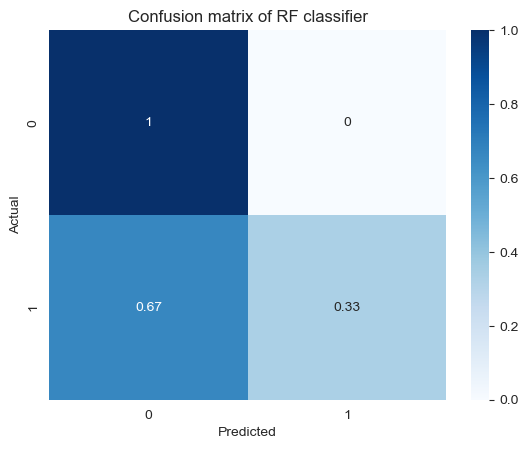

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of RF classifier')
plt.show()

In [19]:
from sklearn.svm import SVC
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.8333333333333334


Seaborn confusion matrix

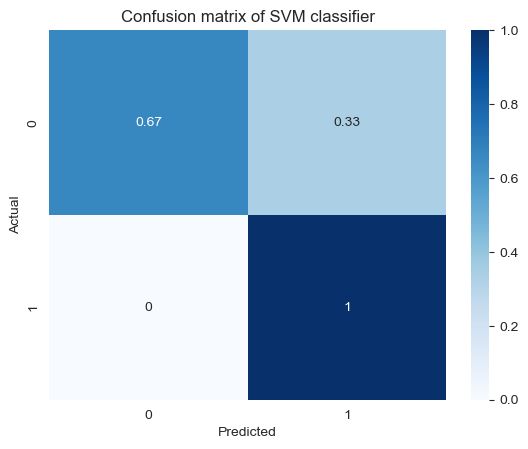

In [20]:


# Plot the confusion matrix
cm = confusion_matrix(y_test, svm.predict(X_test))
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix of SVM classifier')
plt.show()

In [25]:


y = Group2_valence
y = np.array(y)

selector = SelectKBest(f_classif, k=10)
Group2_processed_fit = selector.fit_transform(Group2_processed, Group2_arousal)


Group2_processed_fit = np.array(Group2_processed_fit)


std = StandardScaler()
Group2_processed_std = std.fit_transform(Group2_processed_fit)
print(Group2_processed_std.shape)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Group2_processed_std, y, test_size=0.2, random_state=42)



(30, 10)


/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/ArtHeart/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [26]:
# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test, y_test)
print(f'SVM accuracy: {accuracy}')

SVM accuracy: 0.5
